<a href="https://colab.research.google.com/github/Amoldwalunj/Customer-complaints-text-classification/blob/main/Data_analysis_Jeanet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

**Loading data**

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Jeanet/texts_nlp_50.csv', delimiter='\t')

In [9]:
df.head()

,year_viaf,fem,common_10first,latlon1,mainr,rni3,nprofs,reljob2,scijob2,genres_wcat,roles_wcat,associated_subjects_wcat,titles_by_eng1_wcat,titles_about_eng1_wcat,summaries_by_eng1_wcat,summaries_about_eng1_wcat,dup,dup_about
0,1810,0,0,331,685591,1,NaN,NaN,NaN,maps;; pictorial works;; tourist maps;; pictor...,author;; cartographer;; artist;; illustrator;;...,france--paris;; fortification;; streets;; fran...,"the hotel dieu, paris: as seen from pont st. m...",NaN,in addition to the present edition vallee list...,NaN,1,51660
1,1882,0,1,505,3868102,0,NaN,NaN,NaN,history;; diaries;; caricatures and cartoons,author;; author of introduction;; creator,communism;; socialism;; soviet union;; barbell...,the moscow trial;; a last diary ... with a pre...,NaN,an account of the state trial in moscow of the...,NaN,0,51660
2,1894,0,1,509,3967398,1,1.0,0.0,0.0,history;; fiction,author;; editor,great britain;; fascism;; city promotion;; cit...,action; for king and people;; what the british...,the rebel who lost his cause : the tragedy of ...,NaN,"""""even by the standards of the heated politic...",26422,0
3,1922,feminine,0,290,1600928,1,2.0,0.0,1.0,classification;; bibliographies;; handbooks an...,author;; translator;; editor;; contributor;; o...,botany;; micronesia;; plants;; sedimentary str...,NaN,NaN,the pantropical thespesia populnea (malvaceae...,NaN,0,51660
4,1865,0,0,509,5761595,0,2.0,0.0,0.0,fiction;; humorous fiction;; satire;; juvenile...,illustrator;; author,mistaken identity;; american wit and humor;; i...,told by the colonel;; a dozen all told : bein...,catalogue of an exhibition of water colours b...,"percy groves, a spirited english lad, joins hi...",(1) requests a box to take hal hurst and anoth...,0,0


In [11]:
df.shape

(37387, 18)

**Text cleaning by removing Nan values, converting column- summaries_by_eng1_wcat to string**

In [10]:
###checking nan

num_nan_values = df['summaries_by_eng1_wcat'].isna().sum()
print(num_nan_values)


13008


In [12]:
###removing Nan rows
df = df.dropna(subset=['summaries_by_eng1_wcat'])

In [13]:
### converting summaries_by_eng1_wcat column to string

df['summaries_by_eng1_wcat']= df['summaries_by_eng1_wcat'].astype(str)

**Removing stop words and applying lemmatizer from nltk**

In [14]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# 1. Remove stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['summaries_by_eng1_wcat'] = df['summaries_by_eng1_wcat'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# 2. Remove words with two characters or less
df['summaries_by_eng1_wcat'] = df['summaries_by_eng1_wcat'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 2]))

# 3. Lemmatize the words
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
df['summaries_by_eng1_wcat'] = df['summaries_by_eng1_wcat'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


**Creating word cloud**

In [18]:
# Lemmatized text from df data
lemmatized_text = ' '.join(df['summaries_by_eng1_wcat'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=150).generate(lemmatized_text)

# Print the top words for the df data
print("Top words for df data:")
for word, freq in wordcloud.words_.items():
    print(f"{word}: {freq}")

Top words for df data:
work: 1.0
one: 0.7852177942539388
life: 0.6607970342910102
book: 0.6278962001853569
well: 0.6114457831325302
time: 0.5997451343836886
author: 0.5294253938832252
study: 0.5074142724745134
new: 0.4456672845227062
many: 0.43408248378127895
including: 0.4224976830398517
history: 0.42203429101019463
two: 0.39967562557924
first: 0.33665430954587583
world: 0.3330630213160334
story: 0.323563484708063
family: 0.32228915662650603
system: 0.30734476367006486
set: 0.3071130676552363
text: 0.29819277108433734
man: 0.2973818350324374
problem: 0.2882298424467099
development: 0.28753475440222426
present: 0.2859128822984245
way: 0.27919369786839665
show: 0.27247451343836887
people: 0.2723586654309546
theory: 0.2710843373493976
find: 0.2688832252085264
result: 0.255097312326228
form: 0.253822984244671
analysis: 0.2517377201112141
subject: 0.25023169601482853
made: 0.24930491195551435
become: 0.248725671918443
use: 0.242354031510658
art: 0.24223818350324375
world war: 0.24050046339

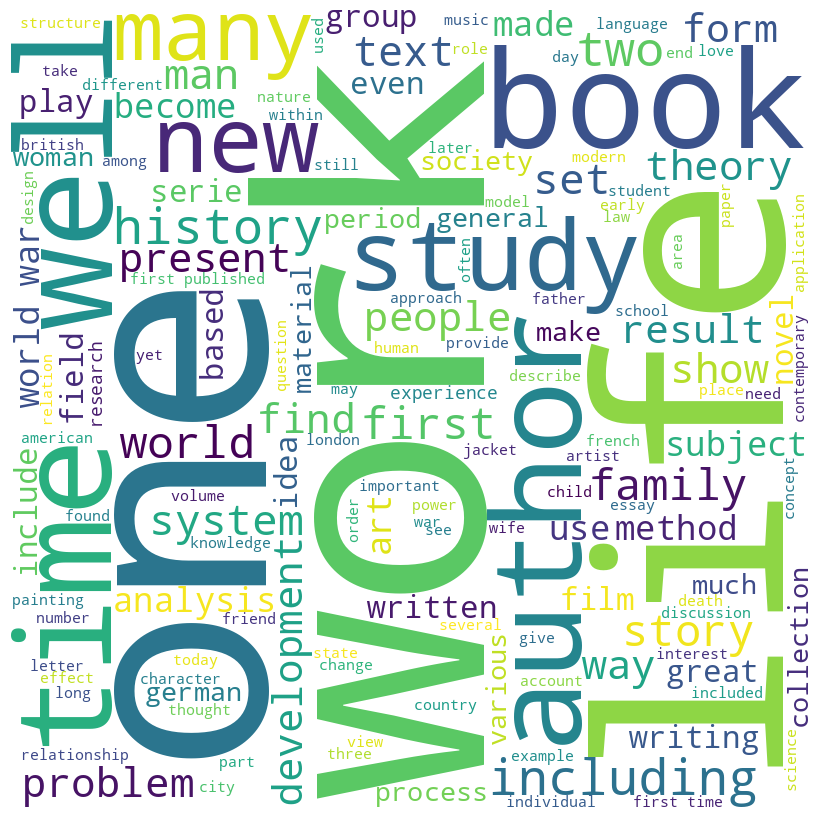

In [20]:
# Display the word cloud using matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Show the plot
plt.show()

**Let's try different lemmetizer from spacy**

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

In [22]:
import spacy

# Load the English NLP model
nlp = spacy.load('en_core_web_sm')

def lemmatize_with_spacy(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

# Apply the lemmatization function to your column
df['summaries_by_eng1_wcat'] = df['summaries_by_eng1_wcat'].apply(lemmatize_with_spacy)

In [23]:
# Lemmatized text from df data
lemmatized_text = ' '.join(df['summaries_by_eng1_wcat'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=150).generate(lemmatized_text)

# Print the top words for the df data
print("Top words for df data:")
for word, freq in wordcloud.words_.items():
    print(f"{word}: {freq}")

Top words for df data:
work: 1.0
one: 0.7468240584598089
well: 0.6825182686902754
study: 0.6279932546374367
time: 0.5944912872400225
include: 0.5899943788645307
book: 0.5472737492973581
life: 0.5314221472737493
use: 0.5265879707700956
make: 0.5035413153456998
write: 0.4735244519392917
find: 0.46340640809443506
author: 0.4321528948847667
many: 0.43080382237211917
show: 0.3917931422147274
present: 0.37403035413153457
history: 0.37178189994378863
new: 0.3697582911748173
two: 0.3568296795952782
give: 0.35368184373243394
set: 0.3452501405283867
take: 0.33243395165823497
follow: 0.3316469926925239
man: 0.32366498032602586
describe: 0.32107925801011805
story: 0.32062956717256885
family: 0.3132096683530073
world: 0.30297920179876336
begin: 0.2987071388420461
become: 0.2976953344575604
see: 0.29724564362001127
form: 0.29465992130410346
result: 0.2917369308600337
lead: 0.2867903316469927
development: 0.2802698145025295
system: 0.2800449690837549
play: 0.2680157391793142
first: 0.2668915120854412

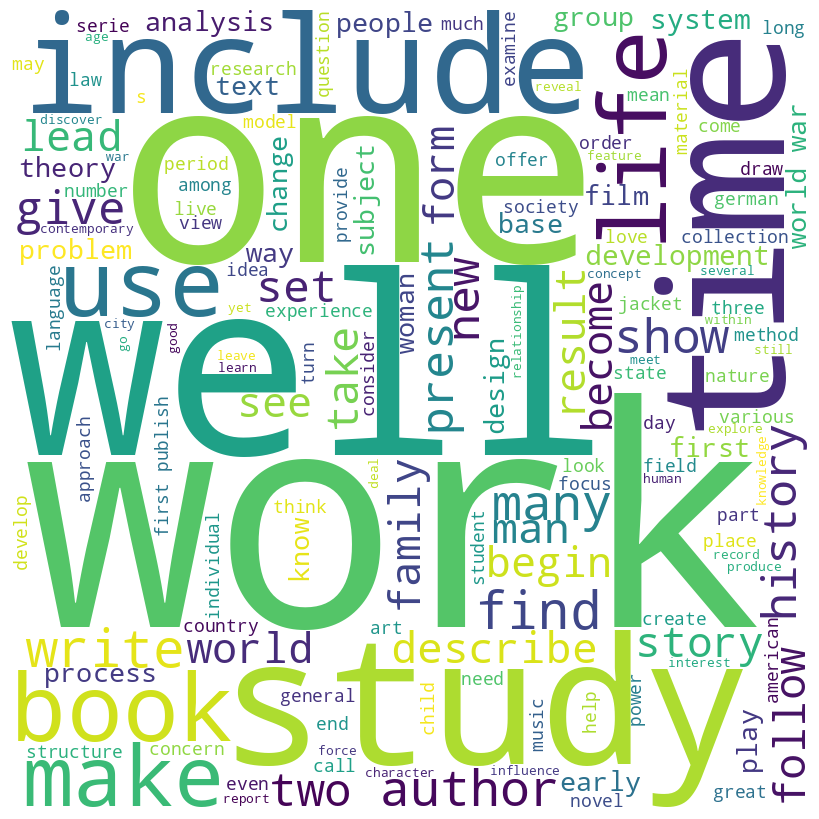

In [24]:
# Display the word cloud using matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Show the plot
plt.show()

**Lets find top word phrases**

In [26]:
import numpy as np
from IPython.display import display, HTML
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from nltk.corpus import stopwords

# Define stop words
stopwords_list = list(stopwords.words('english'))

html = ""

for num_words in range(1, 4):

    # Set up the necessary transformers and the classifier
    vectoriser = CountVectorizer(lowercase=True, stop_words=stopwords_list, min_df=5, max_features=1000,
                                 token_pattern=r'(?u)\b[a-zA-Z][a-zA-Z]+\b', ngram_range=(num_words,num_words))
    transformer = TfidfTransformer()

    # Fit the vectorizer
    X = vectoriser.fit_transform(df['summaries_by_eng1_wcat'])
    sums = X.sum(axis=0)

    html += (f"<h2>Top {num_words}-word phrases</h2>\n")
    html += "<table><tr><td>Rank</td><td>Word(s)</td><td>Count</td></tr>"

    # Display top terms based on their frequency
    top_term_indices = np.argsort(-sums).tolist()[0][:25]
    for ctr, idx in enumerate(top_term_indices):
        term = list(vectoriser.vocabulary_.keys())[list(vectoriser.vocabulary_.values()).index(idx)]
        html += (f"<tr><td>{ctr+1}</td><td>{term}</td><td>{sums[0,idx]}</td><tr>")

    html += "</tr></table>"

display(HTML(html))

Rank,Word(s),Count
1,work,19962
2,book,19849
3,first,14042
4,one,14026
5,include,13479
6,life,13346
7,new,12010
8,world,10317
9,volume,10100
10,also,9899


**Suggestions or next steps for further analysis**

**1. Data Preprocessing:**
1.1. Basic Cleaning:

•	Remove any metadata or non-relevant text sections (if present).

•	Convert all text to lowercase to ensure consistency.

1.2. Expand Contractions:

•	Convert contractions like "won't" to "will not" to ensure proper word separation and meaning.

1.3. Remove Stopwords:

•	Add domain-specific stopwords or commonly occurring words that might not add much context.

**2. Phrase Handling:**

2.1. Detect and Handle Significant Phrases:

•	Use tools like Phrases from the gensim library to detect significant bigrams and trigrams in our text.

•	Integrate these phrases into our dataset so they're treated as single entities (e.g., "world_war").

**3. Text Vectorization:**

3.1. Count Vectorization with N-grams:

•	Employ CountVectorizer with ngram_range to capture unigrams, bigrams, and trigrams.

•	Use parameters like min_df and max_df to filter out terms based on their frequency.

3.2. TF-IDF Vectorization:

•	TfidfVectorizer to give importance to terms that are unique to specific parts of our dataset. This can help in highlighting distinctive terms.

**4. Advanced Text Analysis:**

4.1. Stemming and Lemmatization:

•	While we've tried lemmatization, stemming is another option to reduce words to their base or root form.

 4.2. Topic Modeling:

•	Apply Latent Dirichlet Allocation (LDA) to identify distinct topics in the dataset.

•	Create word clouds for each identified topic to visualize the most significant terms per topic.